<a href="https://colab.research.google.com/github/4bahija/Exploratory-data-analysis-and-clustering-of-venues-in-Delhi-using-Foursquare-API-and-zomato-API/blob/master/Exploratory_data_analysis_and_clustering_of_venues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print("all libraries imported")

/bin/bash: conda: command not found
/bin/bash: conda: command not found
all libraries imported


In [2]:
address='Delhi,India'
geolocator=Nominatim(user_agent="snap_coffee")
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print("The geographical location of delhi are {},{}".format(latitude,longitude))

The geographical location of delhi are 28.6517178,77.2219388


In [3]:
map_delhi=folium.Map(location=[latitude,longitude],zoom_start=12)
map_delhi

In [4]:
CLIENT_ID="G4LMAQN2SDWBH2NMQL1MNQ51X4FODT353TECSHTOIQE30API"
CLIENT_SECRET="UO233V50BMW51I3TO4PRC3EX3INAF4TXSA0ZHCWUMANI4N0R"
VERSION='20200517'
print("Your credentials:")
print("CLIENT_ID:" +CLIENT_ID)
print("CLIENT_SECRET:" +CLIENT_SECRET)


Your credentials:
CLIENT_ID:G4LMAQN2SDWBH2NMQL1MNQ51X4FODT353TECSHTOIQE30API
CLIENT_SECRET:UO233V50BMW51I3TO4PRC3EX3INAF4TXSA0ZHCWUMANI4N0R


In [0]:
radius=5000
LIMIT=100
url="https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radiues={}&limit={}".format(CLIENT_ID,CLIENT_SECRET,VERSION,latitude,longitude,radius,LIMIT)

In [6]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecd2a6a6d8c56001be135cb'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5662936e498e19a9801a663f-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/snacks_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1c7941735',
         'name': 'Snack Place',
         'pluralName': 'Snack Places',
         'primary': True,
         'shortName': 'Snacks'}],
       'id': '5662936e498e19a9801a663f',
       'location': {'address': 'Near Fatehpuri Masjid',
        'cc': 'IN',
        'country': 'India',
        'crossStreet': 'Chandni Chowk',
        'distance': 660,
        'formattedAddress': ['Near Fatehpuri Masjid (Chandni Chowk)', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.657325231761117,
  

In [0]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']


In [8]:
venues=results['response']['groups'][0]['items']
nearby_venues=json_normalize(venues)
filtered_columns=['venue.name','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues=nearby_venues.loc[:,filtered_columns]
nearby_venues['venue.categories']=nearby_venues.apply(get_category_type,axis=1)
nearby_venues.columns=[col.split(".")[-1] for col in nearby_venues.columns]
print(nearby_venues.shape)
nearby_venues.head()

(43, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Amritsari Lassi Wala,Snack Place,28.657325,77.224138
1,Haveli Dharampura,Hotel,28.653247,77.232309
2,bloomrooms @ New Delhi Railway Station,Hotel,28.645537,77.217701
3,Kake Di Hatti | काके दी हट्टी,Indian Restaurant,28.658050,77.223377
4,Jolly Creations Designer Boutique,Boutique,28.662689,77.226300


In [9]:
nearby_venues

,name,categories,lat,lng
0,Amritsari Lassi Wala,Snack Place,28.657325,77.224138
1,Haveli Dharampura,Hotel,28.653247,77.232309
2,bloomrooms @ New Delhi Railway Station,Hotel,28.645537,77.217701
3,Kake Di Hatti | काके दी हट्टी,Indian Restaurant,28.658050,77.223377
4,Jolly Creations Designer Boutique,Boutique,28.662689,77.226300
5,Karim's | करीम | کریم (Karim's),Indian Restaurant,28.649498,77.233691
6,Naturals Ice Cream,Ice Cream Shop,28.634455,77.222139
7,Jama Masjid |जामा मस्जिद | جامع مسجد (Jama Ma...,Mosque,28.650136,77.233541
8,The Drunkyard Cafe,Tibetan Restaurant,28.641451,77.215506
9,Sagar Ratna,Indian Restaurant,28.635487,77.220650


In [10]:

from tqdm import tqdm # for progress bar

headers = {'user-key': '97c22f149ec01c94a453f009210d2653'}
venues_information = []

for index, row in tqdm(nearby_venues.iterrows()):
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    try:
        result = requests.get(url, headers = headers).json()
    except:
        print("There was an error...")
   
    try:
        if (len(result['restaurants']) > 0):
            venue.append(result['restaurants'][0]['restaurant']['name'])
            venue.append(result['restaurants'][0]['restaurant']['cuisines'])
            venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
            venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
            venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
            venue.append(result['restaurants'][0]['restaurant']['price_range'])
            venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
            venue.append(result['restaurants'][0]['restaurant']['location']['address'])
            venues_information.append(venue)
        else:
            venues_information.append(np.zeros(7))
    except:
        pass
        
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'cuisines', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

43it [00:30,  1.41it/s]


In [11]:
zomato_venues=zomato_venues[zomato_venues.venue !=0].reset_index(drop=True)
zomato_venues['rating']=zomato_venues['rating'].astype(float)
print(zomato_venues.shape)
zomato_venues.head()


(42, 8)


,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address
0,Shiv Misthan Bhandar,Mithai,28.6567613009,77.2242988274,150.0,1.0,3.9,"375, Kucha Ghasi Ram, Chandni Chowk, New Delhi"
1,Lakhori - Haveli Dharampura,"Mughlai, Street Food, Kebab",28.6532545820,77.2322656587,2500.0,4.0,4.1,"Haveli Dharampura, 2293, Gali Guliyan, Near Ja..."
2,XO Cafe,"Cafe, Chinese, North Indian, Fast Food",28.6457967876,77.2177612782,950.0,2.0,0.0,"Bloom Rooms Hotel, Opposite Ram Nagar Colony, ..."
3,Kake Di Hatti,"North Indian, Beverages",28.6580019670,77.2233714536,500.0,2.0,4.2,"654 666, Fatehpuri, Church Mission Road, Chand..."
4,Authentique Bites,"Bakery, Desserts",28.6773143931,77.2248208523,300.0,1.0,3.8,"7, Rajpur Road, Civil Lines, New Delhi"


In [12]:
nearby_venues = nearby_venues.drop([1, 7, 18, 35, 36]).reset_index(drop=True) #These row indexes returned 0 in the zomato api call.
print(nearby_venues.shape)
nearby_venues.head()

(38, 4)


,name,categories,lat,lng
0,Amritsari Lassi Wala,Snack Place,28.657325,77.224138
1,bloomrooms @ New Delhi Railway Station,Hotel,28.645537,77.217701
2,Kake Di Hatti | काके दी हट्टी,Indian Restaurant,28.658050,77.223377
3,Jolly Creations Designer Boutique,Boutique,28.662689,77.226300
4,Karim's | करीम | کریم (Karim's),Indian Restaurant,28.649498,77.233691


In [40]:
for lat, lng, label in zip(zomato_venues['latitude'], zomato_venues['longitude'], zomato_venues['venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue').add_to(map_delhi)  
    
map_delhi


In [63]:
nearby_venues['lat']=nearby_venues['lat'].apply(lambda lat:round(float(lat),4)
nearby_venues['lng'] = nearby_venues['lng'].apply(lambda lng:round(float(lng),4))
zomato_venues['latitude']=zomato_venues['latitude'].apply(lambda lat:round(float(lat),4))
zomato_venues['longitude']=zomato_venues['longitude'].apply(lambda lng:round(float(lng),4))

SyntaxError: ignored

In [0]:
dataset=pd.concat([nearby_venues,zomato_venues],axis=1)

In [0]:
dataset['lat_diff']=dataset['latitude']-dataset['lat']
dataset['lng_diff']=dataset['longitude']-dataset['lng']


In [54]:
selected_venues=dataset[(abs(dataset['lat_diff']) <=0.005)& (abs(dataset['lng_diff'])<=0.005)].reset_index(drop=True)
selected_venues

,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Amritsari Lassi Wala,Snack Place,28.6573,77.2241,Shiv Misthan Bhandar,Mithai,28.6568,77.2243,150.0,1.0,3.9,"375, Kucha Ghasi Ram, Chandni Chowk, New Delhi",-0.0005,0.0002
1,Jolly Creations Designer Boutique,Boutique,28.6627,77.2263,Kake Di Hatti,"North Indian, Beverages",28.6580,77.2234,500.0,2.0,4.2,"654 666, Fatehpuri, Church Mission Road, Chand...",-0.0047,-0.0029
2,Wenger's,Bakery,28.6334,77.2183,Sagar Ratna,"South Indian, North Indian, Chinese",28.6354,77.2205,750.0,2.0,3.8,"K-15, Connaught Place, New Delhi",0.0020,0.0022
3,Unplugged,Lounge,28.6343,77.2214,Cafe Coffee Day,"Cafe, Fast Food, Desserts, Beverages, Sandwich",28.6330,77.2197,500.0,2.0,3.7,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",-0.0013,-0.0017
4,HOTEL SARAVANA BHAVAN,South Indian Restaurant,28.6323,77.2164,Peshawari Dhaba,North Indian,28.6307,77.2173,150.0,1.0,3.8,"S-5, Palika Bazar, Connaught Place, New Delhi",-0.0016,0.0009
5,Warehouse Cafe,Lounge,28.6338,77.2210,Unplugged Courtyard,"Finger Food, North Indian, Continental, Momos,...",28.6342,77.2215,1600.0,3.0,4.2,"23/7, L Block, Middle Circle, Connaught Place,...",0.0004,0.0005
6,Khan Chacha | खान चाचा | خان چاچا,Indian Restaurant,28.6342,77.2208,Saravana Bhavan,"South Indian, Mithai, Beverages",28.6323,77.2166,500.0,2.0,4.4,"P-13, Connaught Circus, Connaught Place, New D...",-0.0019,-0.0042
7,Nizam's Kathi Kabab | निजा़म काठी कबाब,Indian Restaurant,28.6349,77.2195,The Beer Cafe - BIGGIE,"Finger Food, Continental",28.6338,77.2208,1500.0,3.0,3.9,"D-2, Inner Circle, Connaught Place, New Delhi",-0.0011,0.0013
8,Fabindia,Clothing Store,28.6320,77.2177,Khan Chacha,"Rolls, Kebab, Mughlai, North Indian",28.6342,77.2210,650.0,2.0,3.9,"D-3, Connaught Place, New Delhi",0.0022,0.0033
9,Wenger's Deli,Deli / Bodega,28.6337,77.2181,Nizam's Kathi Kabab,North Indian,28.6350,77.2195,900.0,2.0,3.9,"H-5/6, Plaza Building, Connaught Place, New Delhi",0.0013,0.0014


In [0]:
selected_venues.loc[4]
selected_venues.drop(selected_venues.index[4], inplace=True)
selected_venues.reset_index(drop=True, inplace=True)
selected_venues.drop(['lat_diff', 'lng_diff'], axis=1, inplace=True)

In [56]:
selected_venues

,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address
0,Amritsari Lassi Wala,Snack Place,28.6573,77.2241,Shiv Misthan Bhandar,Mithai,28.6568,77.2243,150.0,1.0,3.9,"375, Kucha Ghasi Ram, Chandni Chowk, New Delhi"
1,Jolly Creations Designer Boutique,Boutique,28.6627,77.2263,Kake Di Hatti,"North Indian, Beverages",28.6580,77.2234,500.0,2.0,4.2,"654 666, Fatehpuri, Church Mission Road, Chand..."
2,Wenger's,Bakery,28.6334,77.2183,Sagar Ratna,"South Indian, North Indian, Chinese",28.6354,77.2205,750.0,2.0,3.8,"K-15, Connaught Place, New Delhi"
3,Unplugged,Lounge,28.6343,77.2214,Cafe Coffee Day,"Cafe, Fast Food, Desserts, Beverages, Sandwich",28.6330,77.2197,500.0,2.0,3.7,"Gate 7, Rajiv Chowk Metro Station, Connaught P..."
4,Warehouse Cafe,Lounge,28.6338,77.2210,Unplugged Courtyard,"Finger Food, North Indian, Continental, Momos,...",28.6342,77.2215,1600.0,3.0,4.2,"23/7, L Block, Middle Circle, Connaught Place,..."
5,Khan Chacha | खान चाचा | خان چاچا,Indian Restaurant,28.6342,77.2208,Saravana Bhavan,"South Indian, Mithai, Beverages",28.6323,77.2166,500.0,2.0,4.4,"P-13, Connaught Circus, Connaught Place, New D..."
6,Nizam's Kathi Kabab | निजा़म काठी कबाब,Indian Restaurant,28.6349,77.2195,The Beer Cafe - BIGGIE,"Finger Food, Continental",28.6338,77.2208,1500.0,3.0,3.9,"D-2, Inner Circle, Connaught Place, New Delhi"
7,Fabindia,Clothing Store,28.6320,77.2177,Khan Chacha,"Rolls, Kebab, Mughlai, North Indian",28.6342,77.2210,650.0,2.0,3.9,"D-3, Connaught Place, New Delhi"
8,Wenger's Deli,Deli / Bodega,28.6337,77.2181,Nizam's Kathi Kabab,North Indian,28.6350,77.2195,900.0,2.0,3.9,"H-5/6, Plaza Building, Connaught Place, New Delhi"
9,Odeon Social,Café,28.6344,77.2209,Wenger's Deli,"Fast Food, Desserts, Beverages",28.6337,77.2183,500.0,2.0,4.3,"A 18, Radial Road, Connaught Place, New Delhi"


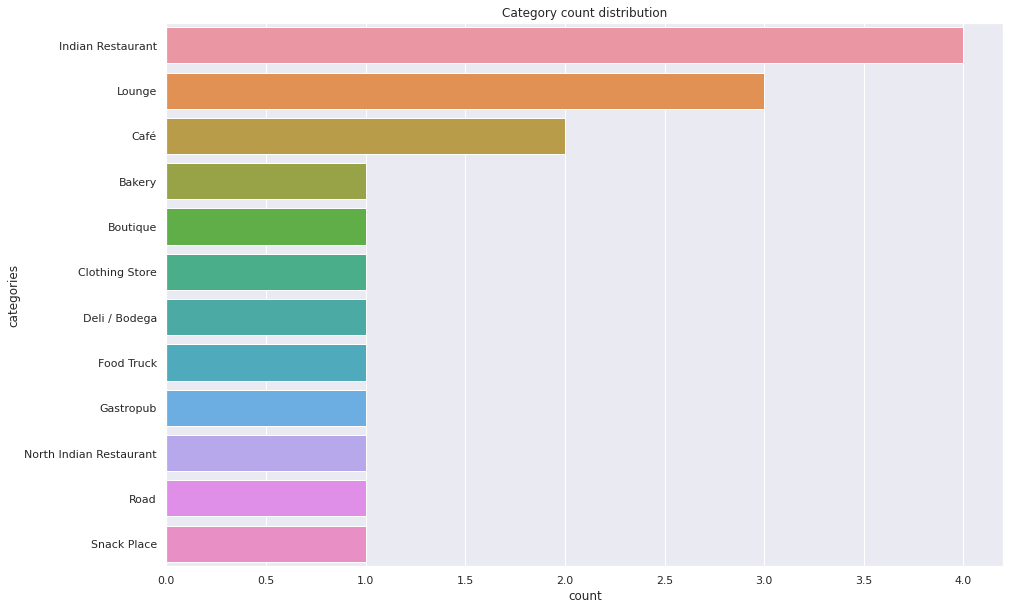

In [57]:
cat=selected_venues.groupby('categories').count()
cat=cat['name'].to_frame().reset_index(drop=False).sort_values(by='name',ascending=False)
cat.rename({'name':'count'},axis=1,inplace=True)
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
ax=sns.barplot(x="count",y="categories",data=cat)
plt.title("Category count distribution")
plt.show()

Obsevation:We have sorted the venues with respect to categories.Out of them the highest number is of the indian restuarants followed by cafe ,lounges and more.Least number of venues is of the snack place.


In [0]:
selected_venues['rating']=selected_venues['rating'].astype(float)
selected_venues=selected_venues[selected_venues['rating']!=0.0]


Text(0.5, 1.0, 'Percentage count of venues w.r.t given ratings')

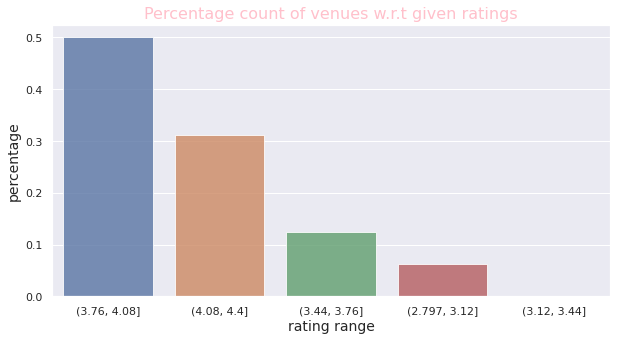

In [65]:
rating=selected_venues['rating'].value_counts(normalize=True,bins=5)
plt.figure(figsize=(10,5))
sns.barplot(rating.index,rating.values,alpha=0.8)
plt.xlabel("rating range",fontsize=14)
plt.ylabel("percentage",fontsize=14)
plt.title("Percentage count of venues w.r.t given ratings",fontsize=16,color='pink')


Observation:From the above barplot we can see that almost 35% of venues have ratings from 3.7-4.08 .


Text(0, 0.5, 'Rating')

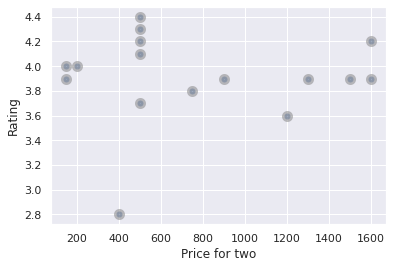

In [66]:
plt.scatter(x="price_for_two",y="rating",data=selected_venues,cmap="blues",alpha=0.5,edgecolors="grey",linewidths=5)
plt.xlabel("Price for two")
plt.ylabel("Rating")


Observation:Upto 1200 rupees(price for two) the rating of the venue is ranging from 3.2 to all the way to 4.5 and after that we have ratings ranging ffrom 4.0 to 4.3.


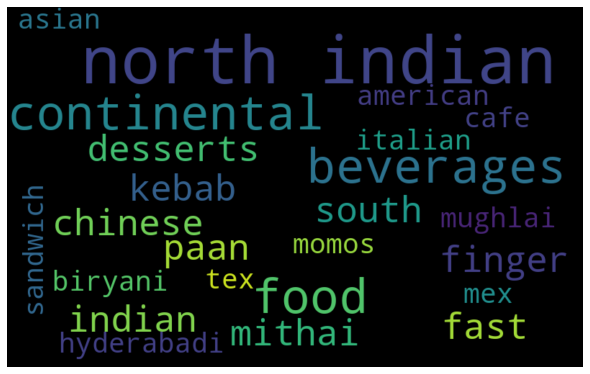

In [67]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in selected_venues.cuisines: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 20).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

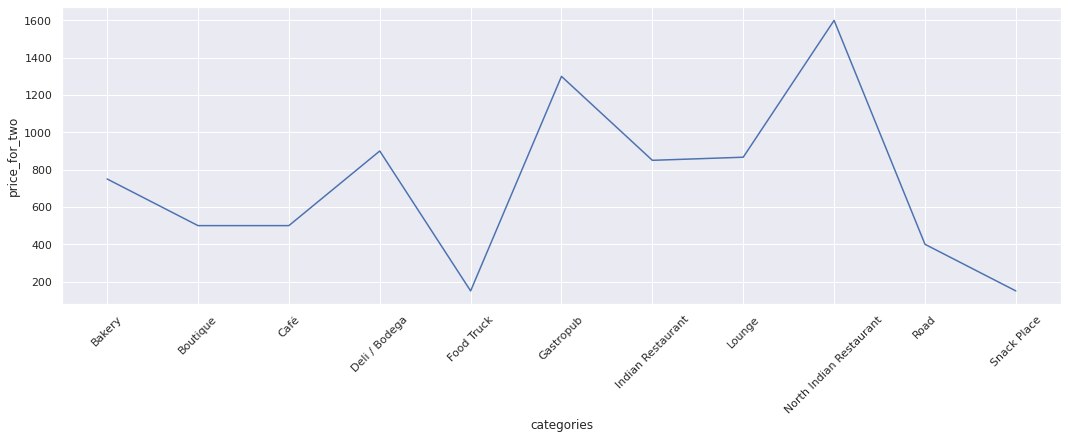

In [68]:
cat_price=selected_venues.groupby('categories').mean()['price_for_two'].to_frame().reset_index(drop=False)
sns.set()
plt.figure(figsize=(15,5))
ax=sns.lineplot(y="price_for_two",x="categories",data=cat_price)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Observation:From the above lineplot we can see the highest amount is charged by north indian restuarants followed by bar and pubs .The least amount is charged by snack place.


In [69]:
selected_venues["price_for_two"].mean()

765.625

The average price for two people across all venues is 765
.00 rupees.

In [70]:
selected_venues['price_range'].value_counts()

2.0    7
3.0    5
1.0    4
Name: price_range, dtype: int64

In [71]:
color_map = {'1.0': 'blue', '2.0': 'green', '3.0': 'orange', '4.0': 'red'}

delhi_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(delhi_map)  
delhi_map

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.preprocessing import normalize
selected_venues = selected_venues.reset_index(drop=True)
vectorizer = TfidfVectorizer(stop_words = 'english', min_df=1, ngram_range=(1,2), max_features=5000)

vectorizer.fit(selected_venues['cuisines'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
cui_vec = vectorizer.transform(selected_venues['cuisines'].values)
#tf_idf_norm = normalize(cui_vec)
tf_idf_array = cui_vec.toarray()

a = pd.DataFrame(tf_idf_array, columns=vectorizer.get_feature_names())
a.head(5)

,american,american tex,asian,beverages,beverages sandwich,biryani,biryani kebab,cafe,cafe fast,chinese,continental,continental american,continental momos,desserts,desserts beverages,fast,fast food,finger,finger food,food,food continental,food desserts,food north,hyderabadi,indian,indian beverages,indian chinese,indian continental,indian hyderabadi,indian italian,indian mithai,indian mughlai,indian north,italian,italian continental,kebab,kebab north,mex,mex north,mithai,mithai beverages,momos,momos asian,mughlai,mughlai kebab,north,north indian,paan,sandwich,south,south indian,tex,tex mex
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0000,0.0000,0.0,0.0
1,0.0,0.0,0.000000,0.479024,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.309182,0.676403,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.329713,0.329713,0.0,0.000000,0.0000,0.0000,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.3767,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.395439,0.000000,0.3767,0.000000,0.0,0.0,0.0,0.0,0.432554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.210849,0.210849,0.0,0.000000,0.3767,0.3767,0.0,0.0
3,0.0,0.0,0.000000,0.238797,0.337192,0.0,0.0,0.337192,0.337192,0.0000,0.000000,0.0,0.000000,0.293652,0.293652,0.293652,0.293652,0.000000,0.000000,0.238797,0.0,0.293652,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.337192,0.0000,0.0000,0.0,0.0
4,0.0,0.0,0.329617,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.233433,0.0,0.329617,0.000000,0.000000,0.000000,0.000000,0.287055,0.287055,0.233433,0.0,0.000000,0.329617,0.0,0.150667,0.000000,0.0000,0.329617,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329617,0.329617,0.0,0.0,0.160672,0.160672,0.0,0.000000,0.0000,0.0000,0.0,0.0


In [73]:
final_df=pd.concat([selected_venues,a],axis=1)
final_df

,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address,american,american tex,asian,beverages,beverages sandwich,biryani,biryani kebab,cafe,cafe fast,chinese,continental,continental american,continental momos,desserts,desserts beverages,fast,fast food,finger,finger food,food,food continental,food desserts,food north,hyderabadi,indian,indian beverages,indian chinese,indian continental,indian hyderabadi,indian italian,indian mithai,indian mughlai,indian north,italian,italian continental,kebab,kebab north,mex,mex north,mithai,mithai beverages,momos,momos asian,mughlai,mughlai kebab,north,north indian,paan,sandwich,south,south indian,tex,tex mex
0,Amritsari Lassi Wala,Snack Place,28.6573,77.2241,Shiv Misthan Bhandar,Mithai,28.6568,77.2243,150.0,1.0,3.9,"375, Kucha Ghasi Ram, Chandni Chowk, New Delhi",0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00000
1,Jolly Creations Designer Boutique,Boutique,28.6627,77.2263,Kake Di Hatti,"North Indian, Beverages",28.6580,77.2234,500.0,2.0,4.2,"654 666, Fatehpuri, Church Mission Road, Chand...",0.00000,0.00000,0.000000,0.479024,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309182,0.676403,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329713,0.329713,0.0,0.000000,0.000000,0.000000,0.00000,0.00000
2,Wenger's,Bakery,28.6334,77.2183,Sagar Ratna,"South Indian, North Indian, Chinese",28.6354,77.2205,750.0,2.0,3.8,"K-15, Connaught Place, New Delhi",0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.37670,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395439,0.000000,0.37670,0.000000,0.000000,0.000000,0.000000,0.000000,0.432554,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210849,0.210849,0.0,0.000000,0.376700,0.376700,0.00000,0.00000
3,Unplugged,Lounge,28.6343,77.2214,Cafe Coffee Day,"Cafe, Fast Food, Desserts, Beverages, Sandwich",28.6330,77.2197,500.0,2.0,3.7,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",0.00000,0.00000,0.000000,0.238797,0.337192,0.000000,0.000000,0.337192,0.337192,0.00000,0.000000,0.00000,0.000000,0.293652,0.293652,0.293652,0.293652,0.000000,0.000000,0.238797,0.000000,0.293652,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.337192,0.000000,0.000000,0.00000,0.00000
4,Warehouse Cafe,Lounge,28.6338,77.2210,Unplugged Courtyard,"Finger Food, North Indian, Continental, Momos,...",28.6342,77.2215,1600.0,3.0,4.2,"23/7, L Block, Middle Circle, Connaught Place,...",0.00000,0.00000,0.329617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.233433,0.00000,0.329617,0.000000,0.000000,0.000000,0.000000,0.287055,0.287055,0.233433,0.000000,0.000000,0.329617,0.000000,0.150667,0.000000,0.00000,0.329617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.329617,0.329617,0.000000,0.000000,0.160672,0.160672,0.0,0.000000,0.000000,0.000000,0.00000,0.00000
5,Khan Chacha | खान चाचा | خان چاچا,Indian Restaurant,28.6342,77.2208,Saravana Bhavan,"South Indian, Mithai, Beverages",28.6

In [74]:
from sklearn.cluster import KMeans
kclusters=3
clustering=final_df.drop(['name','venue','cuisines','address','rating','categories'],axis=1)
kmeans=KMeans(n_clusters=kclusters,random_state=0).fit(clustering)
final_df.insert(0,'cluster_labels',kmeans.labels_)
final_df.head(5)

,cluster_labels,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address,american,american tex,asian,beverages,beverages sandwich,biryani,biryani kebab,cafe,cafe fast,chinese,continental,continental american,continental momos,desserts,desserts beverages,fast,fast food,finger,finger food,food,food continental,food desserts,food north,hyderabadi,indian,indian beverages,indian chinese,indian continental,indian hyderabadi,indian italian,indian mithai,indian mughlai,indian north,italian,italian continental,kebab,kebab north,mex,mex north,mithai,mithai beverages,momos,momos asian,mughlai,mughlai kebab,north,north indian,paan,sandwich,south,south indian,tex,tex mex
0,2,Amritsari Lassi Wala,Snack Place,28.6573,77.2241,Shiv Misthan Bhandar,Mithai,28.6568,77.2243,150.0,1.0,3.9,"375, Kucha Ghasi Ram, Chandni Chowk, New Delhi",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0000,0.0000,0.0,0.0
1,1,Jolly Creations Designer Boutique,Boutique,28.6627,77.2263,Kake Di Hatti,"North Indian, Beverages",28.6580,77.2234,500.0,2.0,4.2,"654 666, Fatehpuri, Church Mission Road, Chand...",0.0,0.0,0.000000,0.479024,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.309182,0.676403,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.329713,0.329713,0.0,0.000000,0.0000,0.0000,0.0,0.0
2,1,Wenger's,Bakery,28.6334,77.2183,Sagar Ratna,"South Indian, North Indian, Chinese",28.6354,77.2205,750.0,2.0,3.8,"K-15, Connaught Place, New Delhi",0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.3767,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.395439,0.000000,0.3767,0.000000,0.0,0.0,0.0,0.0,0.432554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.210849,0.210849,0.0,0.000000,0.3767,0.3767,0.0,0.0
3,1,Unplugged,Lounge,28.6343,77.2214,Cafe Coffee Day,"Cafe, Fast Food, Desserts, Beverages, Sandwich",28.6330,77.2197,500.0,2.0,3.7,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",0.0,0.0,0.000000,0.238797,0.337192,0.0,0.0,0.337192,0.337192,0.0000,0.000000,0.0,0.000000,0.293652,0.293652,0.293652,0.293652,0.000000,0.000000,0.238797,0.0,0.293652,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.337192,0.0000,0.0000,0.0,0.0
4,0,Warehouse Cafe,Lounge,28.6338,77.2210,Unplugged Courtyard,"Finger Food, North Indian, Continental, Momos,...",28.6342,77.2215,1600.0,3.0,4.2,"23/7, L Block, Middle Circle, Connaught Place,...",0.0,0.0,0.329617,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.233433,0.0,0.329617,0.000000,0.000000,0.000000,0.000000,0.287055,0.287055,0.233433,0.0,0.000000,0.329617,0.0,0.150667,0.000000,0.0000,0.329617,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329617,0.329617,0.0,0.0,0.160672,0.160672,0.0,0.000000,0.0000,0.0000,0.0,0.0


In [75]:
kmeans.labels_

array([2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1], dtype=int32)

In [76]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**1 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_df['latitude'], final_df['longitude'], final_df['address'], final_df['cluster_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-3],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [77]:
clus_0 = final_df[final_df['cluster_labels'] == 0]
print("Cluster 0")
clus_0.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address,american,american tex,asian,beverages,beverages sandwich,biryani,biryani kebab,cafe,cafe fast,chinese,continental,continental american,continental momos,desserts,desserts beverages,fast,fast food,finger,finger food,food,food continental,food desserts,food north,hyderabadi,indian,indian beverages,indian chinese,indian continental,indian hyderabadi,indian italian,indian mithai,indian mughlai,indian north,italian,italian continental,kebab,kebab north,mex,mex north,mithai,mithai beverages,momos,momos asian,mughlai,mughlai kebab,north,north indian,paan,sandwich,south,south indian,tex,tex mex
0,0,Warehouse Cafe,Lounge,28.6338,77.2210,Unplugged Courtyard,"Finger Food, North Indian, Continental, Momos,...",28.6342,77.2215,1600.0,3.0,4.2,"23/7, L Block, Middle Circle, Connaught Place,...",0.00000,0.00000,0.329617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233433,0.00000,0.329617,0.0,0.0,0.0,0.0,0.287055,0.287055,0.233433,0.000000,0.0,0.329617,0.0,0.150667,0.0,0.0,0.329617,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.329617,0.329617,0.000000,0.000000,0.160672,0.160672,0.0,0.0,0.0,0.0,0.00000,0.00000
1,0,Nizam's Kathi Kabab | निजा़म काठी कबाब,Indian Restaurant,28.6349,77.2195,The Beer Cafe - BIGGIE,"Finger Food, Continental",28.6338,77.2208,1500.0,3.0,3.9,"D-2, Inner Circle, Connaught Place, New Delhi",0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377473,0.00000,0.000000,0.0,0.0,0.0,0.0,0.464183,0.464183,0.377473,0.533008,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.00000
2,0,Panchayat Paan Parlour,Indian Restaurant,28.6341,77.2226,Route 04,"Continental, American, Tex-Mex, North Indian",28.6350,77.2204,1200.0,3.0,3.6,"K-2, Middle Circle, Connaught Place, New Delhi",0.34952,0.34952,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247528,0.34952,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.159765,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.34952,0.34952,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.170374,0.170374,0.0,0.0,0.0,0.0,0.34952,0.34952
3,0,Pind Balluchi,North Indian Restaurant,28.6303,77.2176,The Immigrant Cafe,"North Indian, Italian, Continental",28.6342,77.2189,1600.0,3.0,3.9,"B 45, 1st Floor, Inner Circle, Connaught Place...",0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346153,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.223422,0.0,0.0,0.000000,0.0,0.488783,0.0,0.000000,0.0,0.488783,0.488783,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.238258,0.238258,0.0,0.0,0.0,0.0,0.00000,0.00000
4,0,Tamasha,Gastropub,28.6297,77.2218,PIND BALLUCHI,"North Indian, Mughlai, Kebab",28.6304,77.2176,1300.0,3.0,3.9,"13, Regal Building, Connaught Place, New Delhi",0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.216866,0.0,0.0,0.000000,0.0,0.000000,0.0,0.474441,0.0,0.000000,0.000000,0.413179,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.000000,0.474441,0.474441,0.231267,0.231267,0.0,0.0,0.0,0.0,0.00000,0.00000


Observation:This cluster is quite varies as it contains venues rated from 3.7 to 4.5. The price ranges between 1200/- to 1600/-. It can be inferred all the high priced venues are clubbed together in this cluster containing mutiple varities of cuisines across all of them.

In [78]:
clus_1= final_df[final_df['cluster_labels'] == 1]
print("Cluster 1")
clus_1.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address,american,american tex,asian,beverages,beverages sandwich,biryani,biryani kebab,cafe,cafe fast,chinese,continental,continental american,continental momos,desserts,desserts beverages,fast,fast food,finger,finger food,food,food continental,food desserts,food north,hyderabadi,indian,indian beverages,indian chinese,indian continental,indian hyderabadi,indian italian,indian mithai,indian mughlai,indian north,italian,italian continental,kebab,kebab north,mex,mex north,mithai,mithai beverages,momos,momos asian,mughlai,mughlai kebab,north,north indian,paan,sandwich,south,south indian,tex,tex mex
0,1,Jolly Creations Designer Boutique,Boutique,28.6627,77.2263,Kake Di Hatti,"North Indian, Beverages",28.6580,77.2234,500.0,2.0,4.2,"654 666, Fatehpuri, Church Mission Road, Chand...",0.0,0.0,0.0,0.479024,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.309182,0.676403,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.329713,0.329713,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,1,Wenger's,Bakery,28.6334,77.2183,Sagar Ratna,"South Indian, North Indian, Chinese",28.6354,77.2205,750.0,2.0,3.8,"K-15, Connaught Place, New Delhi",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.37670,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.395439,0.000000,0.37670,0.0,0.000000,0.0,0.000000,0.0,0.432554,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.210849,0.210849,0.0,0.000000,0.376700,0.376700,0.0,0.0
2,1,Unplugged,Lounge,28.6343,77.2214,Cafe Coffee Day,"Cafe, Fast Food, Desserts, Beverages, Sandwich",28.6330,77.2197,500.0,2.0,3.7,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",0.0,0.0,0.0,0.238797,0.337192,0.000000,0.000000,0.337192,0.337192,0.00000,0.0,0.0,0.0,0.293652,0.293652,0.293652,0.293652,0.0,0.0,0.238797,0.0,0.293652,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.337192,0.000000,0.000000,0.0,0.0
3,1,Khan Chacha | खान चाचा | خان چاچا,Indian Restaurant,28.6342,77.2208,Saravana Bhavan,"South Indian, Mithai, Beverages",28.6323,77.2166,500.0,2.0,4.4,"P-13, Connaught Circus, Connaught Place, New D...",0.0,0.0,0.0,0.317167,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.204713,0.000000,0.00000,0.0,0.000000,0.0,0.447853,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.390023,0.447853,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.390023,0.390023,0.0,0.0
4,1,Wenger's Deli,Deli / Bodega,28.6337,77.2181,Nizam's Kathi Kabab,North Indian,28.6350,77.2195,900.0,2.0,3.9,"H-5/6, Plaza Building, Connaught Place, New Delhi",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.552627,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.589323,0.589323,0.0,0.000000,0.000000,0.000000,0.0,0.0
5,1,Odeon Social,Café,28.6344,77.2209,Wenger's Deli,"Fast Food, Desserts, Beverages",28.6337,77.2183,500.0,2.0,4.3,"A 18, Radial Road, Connaught Place, New Delhi",0.0,0.0,0.0,0.323407,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.397697,0.397697,0.397697,0.397697,0.0,0.0,0.323407,0.0,0.397697,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
6,1,Aqua,Lounge,28.6288,77.2156,Biryani Battuta,"Biryani, Kebab, North Indian, Hyderabadi",28.6320,77.2174,500.

Observation: This cluster contains mostly medium priced venues with varied ratings ranging from 300/- to 500/-.

In [79]:
clus_2= final_df[final_df['cluster_labels'] == 2]
print("Cluster 2")
clus_2.head(10).reset_index(drop = True)

Cluster 2


,cluster_labels,name,categories,lat,lng,venue,cuisines,latitude,longitude,price_for_two,price_range,rating,address,american,american tex,asian,beverages,beverages sandwich,biryani,biryani kebab,cafe,cafe fast,chinese,continental,continental american,continental momos,desserts,desserts beverages,fast,fast food,finger,finger food,food,food continental,food desserts,food north,hyderabadi,indian,indian beverages,indian chinese,indian continental,indian hyderabadi,indian italian,indian mithai,indian mughlai,indian north,italian,italian continental,kebab,kebab north,mex,mex north,mithai,mithai beverages,momos,momos asian,mughlai,mughlai kebab,north,north indian,paan,sandwich,south,south indian,tex,tex mex
0,2,Amritsari Lassi Wala,Snack Place,28.6573,77.2241,Shiv Misthan Bhandar,Mithai,28.6568,77.2243,150.0,1.0,3.9,"375, Kucha Ghasi Ram, Chandni Chowk, New Delhi",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Rajdhani Thali,Indian Restaurant,28.6300,77.2204,Odeon Gupta Paan Palace,Paan,28.6342,77.2209,200.0,1.0,4.0,"1, D Block, Connaught Place, New Delhi",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Jain Chawal Wale,Food Truck,28.6301,77.2176,Yamu's Panchayat,Paan,28.6343,77.2226,150.0,1.0,4.0,"92, NDMC Market, Connaught Place, New Delhi",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Observation: This cluster contains all the low priced venues from from as low as 100/- to 300/- at max, although the average ratings is almost above 4 which is quite good. The cuisines available across these venues comprise mostly of fastfoods and snacks.


Results and Discussion:
Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Delhi India.

After collecting data from the Foursquare and Zomato API's, we got a list of 48 and 49 different venues respectively. However, not all venues from the two APIs were identical, also the count was not same. So we inspected their latitude and longitude values to remove all the outliers. This resulted in a total venue count of 28. We used TFIDF vectorizer for converting text data to numerical data.

We identified that from the total set of venues, majority of them were Cafes and indian Restaurants. People of Delhi do love Indian food a lot. Also we did a wordcloud for the cusines available in those venues. Indian topped among them followed by North Indian food and fastfoods.A visitor who loves Cafes/north Indian restaurants would surely love coming to Delhi.

While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This means that most restaurants provide good quality food which is liked by the people of the city which indicates quality of the food is quite good. Around 35% of the venues have rating 3.94-4.22 and around 23% in the rating range 3.66-3.94 which is obtained by normalizing the value counts.

When we take a look at the price values of each venue, we explore that many venues in a particular cluster have prices which are in the range of Rs 100 to Rs 500 for two person, which considering today's market is very cheap. And what's more interesting is that most of them are rated above 4, so these places must be serving very delicious foods. The food in these places mostly revolves around snacks, beverages and fastfoods.

However, the variation in prices is large in another cluster, given the complete range starts from Rs 1200 and goes uptil Rs 1600. On plotting the venues based on their price range on the map, we discovered that venues are mostly together mixed. A mix of medium price and high price exist in the northern portion of the map.
So summing up,
If you're looking for cheap places with relatively high rating, you should check the southern part.
If you're looking for the posh venues, you should visit the northern portion.
If you're looking to explore the city and have no specific criteria to decide upon the places you want to visit, you should not choose any portion of the map rather roam all over kolkata and you will definitely find great places.

Conclusion
The purpose of this project was to explore the places that anyone visiting Delhi could enjoy. The venues have been identified using Foursquare and Zomato API and have been plotted on the map. Via the visualizations and analysis we presented a range of options for people to choose from while exploring Delhi, pricing ranges, growing taste of Delhi in terms of high rated cuisines and hoping that this analysis will come in handy for potential food business setups.